# Perceptron pour le reconnaissance de chiffres manuscrits

L'objectif de ce TP est de reconnaître des chiffres manuscrits d'une base de test à partir d'une base d'apprentissage et des réseaux de neurones. 
La base de données du MNIST{http://yann.lecun.com/exdb/mnist/} sur les chiffres manuscrits comprend un ensemble de 60 000 exemples d'apprentissage  et un ensemble de 10 000 exemples de test.  Les chiffres, dont quelques exemples sont représentés sur la figure, ont été normalisés et centrés dans une image de taille fixe $28\times 28$ pixels. 

![mnist](https://www.ttested.com/gallery/thumbnails/ditch-mnist.jpg)




In [1]:
# importer des librairies avec tensorflow==1.15 , keras==2.3.1
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential

# Chargement des données

In [2]:
# Nombre de classes
num_classes = 10

# Chargement base d'apprentissage et de test 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalisation 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# transformation des images (matrices 28 x 28) en vecteur de dimension 784 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784)
60000 train samples
10000 test samples


# Perceptron mono couche


In [7]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(10, activation="softmax", input_dim=784))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 2s 465us/step - loss: 0.4149 - acc: 0.8892 - val_loss: 0.2909 - val_acc: 0.9192
Epoch 2/10
3750/3750 [==============================] - 2s 454us/step - loss: 0.2922 - acc: 0.9179 - val_loss: 0.2772 - val_acc: 0.9215
Epoch 3/10
3750/3750 [==============================] - 2s 441us/step - loss: 0.2761 - acc: 0.9227 - val_loss: 0.2707 - val_acc: 0.9255
Epoch 4/10
3750/3750 [==============================] - 2s 444us/step - loss: 0.2682 - acc: 0.9253 - val_loss: 0.2669 - val_acc: 0.9263
Epoch 5/10
3750/3750 [==============================] - 2s 448us/step - loss: 0.2626 - acc: 0.9272 - val_loss: 0.2703 - val_acc: 0.9251
Epoch 6/10
3750/3750 [==============================] - 2s 444us/step - loss: 0.2589 - acc: 0.9283 - val_loss: 0.2665 - val_acc: 0.9266
Epoch 7/10
3750/3750 [==============================] - 2s 445us/step - loss: 0.2554 - acc: 0.9294 - val_loss: 0.2662 - val_acc: 0.9272
Epoch 8/10
3750/3750 [==========================

In [9]:
# Analyse des résultats 

def plot_training_analysis():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
    plt.plot(epochs, val_loss,'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

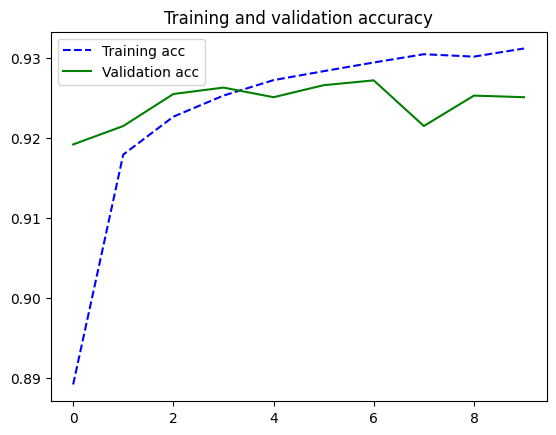

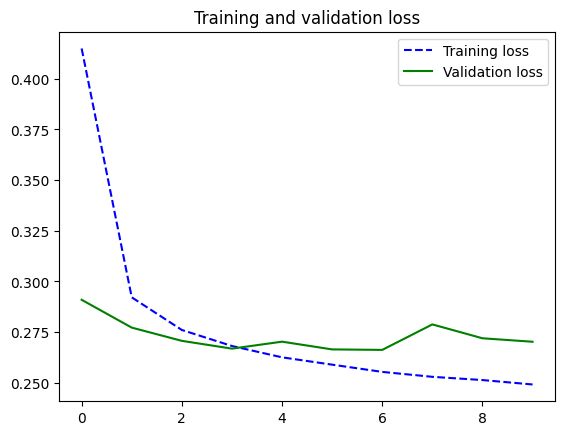

In [10]:
plot_training_analysis()

# Perceptron Multi-couches

In [21]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(800, activation="relu", input_dim=784))
model.add(Dense(800, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 800)               628000    
                                                                 
 dense_12 (Dense)            (None, 800)               640800    
                                                                 
 dense_13 (Dense)            (None, 10)                8010      
                                                                 
Total params: 1276810 (4.87 MB)
Trainable params: 1276810 (4.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Optimisation du modèle
opt = keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1840 - acc: 0.9429 - val_loss: 0.1110 - val_acc: 0.9656
Epoch 2/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0911 - acc: 0.9723 - val_loss: 0.0826 - val_acc: 0.9758
Epoch 3/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0667 - acc: 0.9801 - val_loss: 0.0873 - val_acc: 0.9753
Epoch 4/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0519 - acc: 0.9842 - val_loss: 0.1008 - val_acc: 0.9739
Epoch 5/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0466 - acc: 0.9856 - val_loss: 0.1102 - val_acc: 0.9744
Epoch 6/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0359 - acc: 0.9897 - val_loss: 0.1713 - val_acc: 0.9677
Epoch 7/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0344 - acc: 0.9901 - val_loss: 0.1115 - val_acc: 0.9758
Epoch 8/10
3750/3750 [==============================] - 8s 2ms

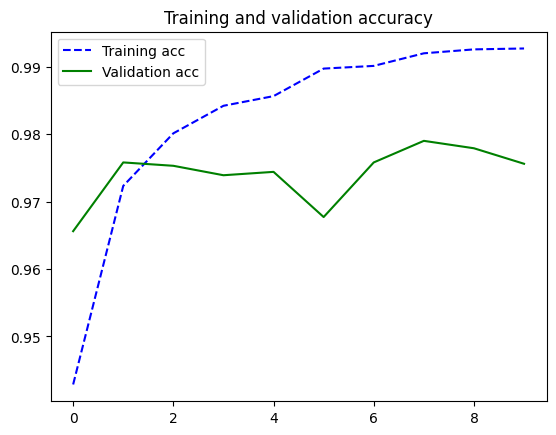

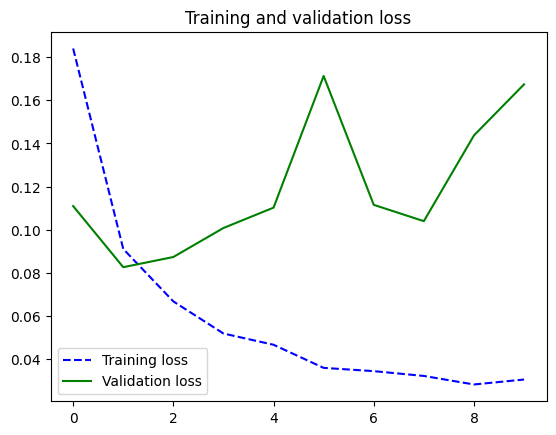

In [23]:
plot_training_analysis()